to do:
- histograms

In [1]:
from glob import glob
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import xgcm
from xorca.lib import load_xorca_dataset
import pickle
import eddytools as et
from cmocean import cm
from dask.diagnostics import ProgressBar
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import timedelta
import matplotlib.colors as colors
import seawater as sw
import math
import scipy.stats as stats
from matplotlib import axes


import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
datapath = '/scratch/usr/shkifmmp/manusc/data/'

In [3]:
with open(datapath + 'EXP06/detected/stat_postpoc_EXP06_acc_1958_2018.pkl', 'rb') as f:
    ed_06  = pickle.load(f)
f.close()

with open(datapath + 'EXP05/detected/stat_postpoc_EXP05_acc_1958_2018.pkl', 'rb') as f:
    ed_05  = pickle.load(f)
f.close()

In [24]:
# AFTER FILES ARE SAVED, NOT NECESSARY ANYMORE
# def open_eddy_stat(model): #for exp05 n precisa; exp06 ate 1996, precisa
#     if model == 1:
#         with open(datapath + 'EXP06/detected/stat_EXP06_acc_1958_1996.pkl', 'rb') as f:
#             eddy_stat1  = pickle.load(f)
#         f.close()
        
#         with open(datapath + 'EXP06/detected/stat_EXP06_acc_1993_2018.pkl', 'rb') as f:
#             eddy_stat2  = pickle.load(f)
#         f.close()
        
#     else:

#         with open(file= datapath + 'EXP05/detected/stat_EXP05_acc_1958_1995.pkl', mode='rb') as f:
#             eddy_stat1  = pickle.load(f)
#         f.close()
        
#         with open(file= datapath + 'EXP05/detected/stat_EXP05_acc_1993_2018.pkl', mode='rb') as f:
#             eddy_stat2  = pickle.load(f)
#         f.close()
        
# #     eddy_stat = eddy_stat.drop(labels=['lon','lat','amp','area','scale', 'area_max', 'area_mean','scale_min','exist_at_start','terminated'],axis=1)
# #     eddy_stat.loc[:,'scale_mean'] *= 2
# #     eddy_stat.loc[:,'scale_max'] *= 2

# #     eddy_stat = eddy_stat.loc[(eddy_stat['life_time'].astype('timedelta64[D]') >= 30)]
# #     eddy_stat.loc[:, 'life_time'] = eddy_stat.loc[:, 'life_time'].astype('timedelta64[D]')

    
#     if model == 1:
#         eddy_stat1 = eddy_stat1.drop(labels=['lon','lat','amp','area','scale','exist_at_start','terminated'],axis=1)
#         eddy_stat1.loc[:,'scale_mean'] *= 2
#         eddy_stat1.loc[:,'scale_max'] *= 2
#         eddy_stat1 = eddy_stat1.loc[(eddy_stat1['life_time'].astype('timedelta64[D]') >= 30)]
#         eddy_stat1.loc[:, 'life_time'] = eddy_stat1.loc[:, 'life_time'].astype('timedelta64[D]')       
#         eddy_stat1 = eddy_stat1.drop('time', axis=1)
        
#     eddy_stat1 = eddy_stat1.drop(eddy_stat1.loc[eddy_stat1['year_i'] >= 1993].index)
    
#     eddy_stat = pd.concat([eddy_stat1, eddy_stat2])
    
#     return eddy_stat

In [22]:
# save processed eddy_stat once
# ed_05 = open_eddy_stat(0)

# ed_06 = open_eddy_stat(1)

# ed_05.to_pickle(path='/scratch/usr/shkifmmp/manusc/data/EXP05/detected/stat_postpoc_EXP05_acc_1958_2018.pkl')

# ed_06.to_pickle(path='/scratch/usr/shkifmmp/manusc/data/EXP06/detected/stat_postpoc_EXP06_acc_1958_2018.pkl')

In [20]:
ed_05

,type,life_time,distance,speed,area_mean,area_max,amp_mean,amp_max,scale_mean,scale_min,scale_max,year_i,year_f
1490,cyclonic,75.0,57.593258,0.888785,613.494738,823.972722,0.000001,0.000002,27.690307,9.054582,32.390039,1958.0,1958.0
1499,anticyclonic,35.0,23.101732,0.763946,452.878477,586.194631,0.000002,0.000002,23.865021,9.734048,27.319703,1958.0,1958.0
1500,cyclonic,190.0,18.416034,0.112183,1212.861477,1990.970476,0.000002,0.000003,38.810625,13.791120,50.348608,1958.0,1958.0
1502,anticyclonic,30.0,141.343783,5.453078,1606.871152,2569.323367,0.000005,0.000007,44.501256,17.280942,57.195840,1958.0,1958.0
1510,cyclonic,40.0,50.639705,1.465269,3089.090560,4135.445519,0.000004,0.000007,62.258234,24.334416,72.563164,1958.0,1958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607450,anticyclonic,30.0,60.271382,2.325285,15184.973759,17653.782326,0.000004,0.000004,138.794993,61.893696,149.924960,2018.0,2018.0
607453,anticyclonic,30.0,114.998456,4.436669,1285.905482,1417.974266,0.000002,0.000002,40.408091,18.968491,42.490245,2018.0,2018.0
607458,anticyclonic,30.0,26.822130,1.034804,11624.514190,12524.717321,0.000010,0.000011,121.613137,58.226111,126.281295,2018.0,2018.0
607461,cyclonic,30.0,152.725178,5.892175,3824.468951,5944.042775,0.000006,0.000010,69.003326,26.074315,86.995347,2018.0,2018.0


In [26]:
def time_series(data):
    data_yearly = data.loc[data['year_i'] == data['year_f']].groupby(['year_i'], as_index=False).mean()
    data_yearly = data_yearly.assign(cont=data.loc[data['year_i'] == data['year_f']].groupby(['year_i'], as_index=False).count().amp_mean)
    
    return data_yearly

In [27]:
ed_06_y = time_series(ed_06)

In [29]:
ed_05_y = time_series(ed_05)

In [47]:
axs[0,1].legend?

Object `legend` not found.


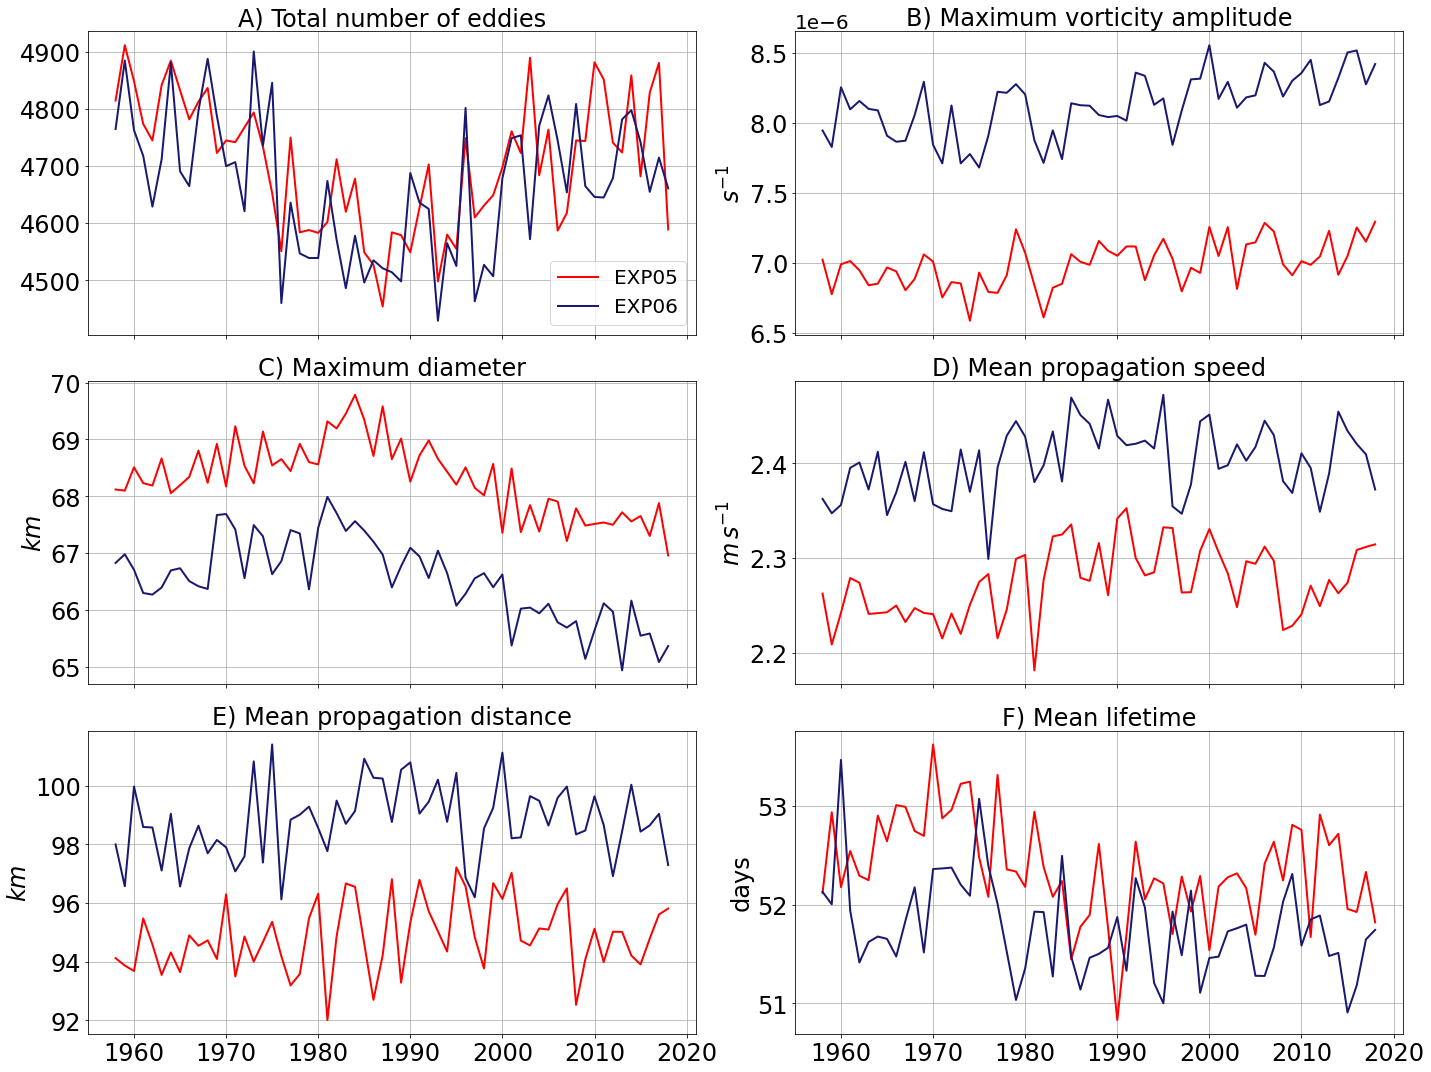

In [69]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

title = ['A) Total number of eddies', 'B) Maximum vorticity amplitude', 'C) Maximum diameter', 'D) Mean propagation speed', 'E) Mean propagation distance', 'F) Mean lifetime']
ylabel = ['', '$s^{-1}$', '$km$', '$m\,s^{-1}$', '$km$', 'days']
var = ['cont', 'amp_max', 'scale_max', 'speed', 'distance', 'life_time']
    
for ax, v, t, yla in zip(axs.flat, var, title, ylabel):
    ed_05_y.plot(x='year_i', y=v, linewidth=2, color='red', ax=ax,label='EXP05')
    ed_06_y.plot(x='year_i', y=v, ax=ax, linewidth=2, label='EXP06', color='midnightblue')
    
    ax.set_title(t, fontsize=24)
    ax.tick_params(axis= 'x', labelsize= 24)
    ax.tick_params(axis= 'y', labelsize= 24)
    ax.set_xlabel(None)
    ax.set_ylabel(yla, fontsize=24)
    ax.grid()
#     ax.axes.xaxis.set_ticklabels([])
    ax.get_legend().remove()

for ax in axs.flat[0:4]:
    ax.axes.xaxis.set_ticklabels([])

    
# for ax in axs[4:6]:
# axs[3].set_xlabel('year', fontsize=24)
# axs[5].set_xlabel('year', fontsize=24)

# ax.axes.xaxis.set_ticklabels(
leg = axs[0,0].legend(loc='lower right', fontsize=20)
axs[0,1].yaxis.offsetText.set_fontsize(20)

    
plt.tight_layout(h_pad=1.80)
save_path = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/fig_paper/'
plt.savefig(save_path + 'annual_timeseries_1958_2018.png', format='png', facecolor="w",  bbox_inches='tight')

### histograms

In [ ]:
# Histograms of EXP06, EXP05 and observations (maybe more than one), ACC mask and whole 30S-68S → 1 figure (diameter, amplitude, speed, length, lifetime)

In [15]:
ed_06

,type,life_time,distance,speed,area_mean,area_max,amp_mean,amp_max,scale_mean,scale_min,scale_max,year_i,year_f
1419,cyclonic,45.0,50.188343,1.290852,751.534970,1456.482161,0.000002,0.000003,30.099535,10.567254,43.063333,1958.0,1958.0
1421,cyclonic,35.0,52.312430,1.729908,4482.087888,6898.392893,0.000004,0.000005,74.821569,31.016208,93.719297,1958.0,1958.0
1428,anticyclonic,35.0,23.230740,0.768212,461.998482,610.514365,0.000002,0.000002,24.098548,9.734048,27.880657,1958.0,1958.0
1429,cyclonic,45.0,14.240802,0.366276,1752.963671,1923.459492,0.000002,0.000003,47.202792,21.661012,49.487622,1958.0,1958.0
1430,anticyclonic,30.0,141.585504,5.462404,1592.441824,2569.738733,0.000005,0.000007,44.245286,16.820495,57.200463,1958.0,1958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654253,cyclonic,30.0,22.023019,0.849654,1711.741732,2014.949016,0.000004,0.000005,46.541693,20.339626,50.650891,2018.0,2018.0
654271,cyclonic,30.0,17.358020,0.669677,1163.038020,1738.914872,0.000003,0.000005,37.897296,13.736657,47.053748,2018.0,2018.0
654299,anticyclonic,30.0,237.098631,9.147324,2923.097100,4098.551670,0.000012,0.000017,60.270532,21.956278,72.238757,2018.0,2018.0
654308,cyclonic,30.0,51.043617,1.969275,2000.418388,3427.845055,0.000017,0.000035,48.909435,14.852785,66.064119,2018.0,2018.0


In [73]:
# ADD TITLES
var_dict = {'amp_max':{'int': 3e-7, 'xlim': [-0.1*1e-5, 2*1e-5], 'title':},
            'scale_max': {'int': 1, 'xlim': [15, 140]},
           'speed': {'int': 0.1, 'xlim': [0, 5]},
           'distance': {'int': 5, 'xlim': [0, 400]},
           'life_time': {'int': 15, 'xlim': [30, 365]}}

SyntaxError: invalid syntax (662327628.py, line 1)

In [61]:
for item in var_dict.keys():
    print(var_dict[item]['int'] - 3)

-2.9999997
-2
-2.9
2
12


In [77]:
ed_05

,type,life_time,distance,speed,area_mean,area_max,amp_mean,amp_max,scale_mean,scale_min,scale_max,year_i,year_f
1490,cyclonic,75.0,57.593258,0.888785,613.494738,823.972722,0.000001,0.000002,27.690307,9.054582,32.390039,1958.0,1958.0
1499,anticyclonic,35.0,23.101732,0.763946,452.878477,586.194631,0.000002,0.000002,23.865021,9.734048,27.319703,1958.0,1958.0
1500,cyclonic,190.0,18.416034,0.112183,1212.861477,1990.970476,0.000002,0.000003,38.810625,13.791120,50.348608,1958.0,1958.0
1502,anticyclonic,30.0,141.343783,5.453078,1606.871152,2569.323367,0.000005,0.000007,44.501256,17.280942,57.195840,1958.0,1958.0
1510,cyclonic,40.0,50.639705,1.465269,3089.090560,4135.445519,0.000004,0.000007,62.258234,24.334416,72.563164,1958.0,1958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607450,anticyclonic,30.0,60.271382,2.325285,15184.973759,17653.782326,0.000004,0.000004,138.794993,61.893696,149.924960,2018.0,2018.0
607453,anticyclonic,30.0,114.998456,4.436669,1285.905482,1417.974266,0.000002,0.000002,40.408091,18.968491,42.490245,2018.0,2018.0
607458,anticyclonic,30.0,26.822130,1.034804,11624.514190,12524.717321,0.000010,0.000011,121.613137,58.226111,126.281295,2018.0,2018.0
607461,cyclonic,30.0,152.725178,5.892175,3824.468951,5944.042775,0.000006,0.000010,69.003326,26.074315,86.995347,2018.0,2018.0


In [74]:
# CHANGE XLIMS, ADD OBSERVATIONS
def plot_histogram():
    
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
    count=0    
        
    for idx, v in enumerate(var_dict.keys()):
        bins_6 = math.ceil((ed_06[v].max() - ed_06[v].min()) / var_dict[v]['int'])
        y_ed6, bins_ed6 = np.histogram(ed_06[v], bins=bins_6)
        bincenters_e6= 0.5*(bins_ed6[1:]+bins_ed6[:-1])

        bins_5 = math.ceil((ed_05[v].max() - ed_05[v].min()) / var_dict[v]['int'])
        y_ed5, bins_ed5 = np.histogram(ed_05[v], bins=bins_5)
        bincenters_e5= 0.5*(bins_ed5[1:]+bins_ed5[:-1])       
        
        axs[idx,0].plot(bincenters_e6, y_ed6, label= 'EXP06', color='midnightblue', linewidth=2)
        axs[idx,0].plot(bincenters_e5, y_ed5, label= 'EXP05', color='red', linewidth=2)
        
        axs[idx,0].set_xlim(left=var_dict[v]['xlim'][0], right=var_dict[v]['xlim'][1])

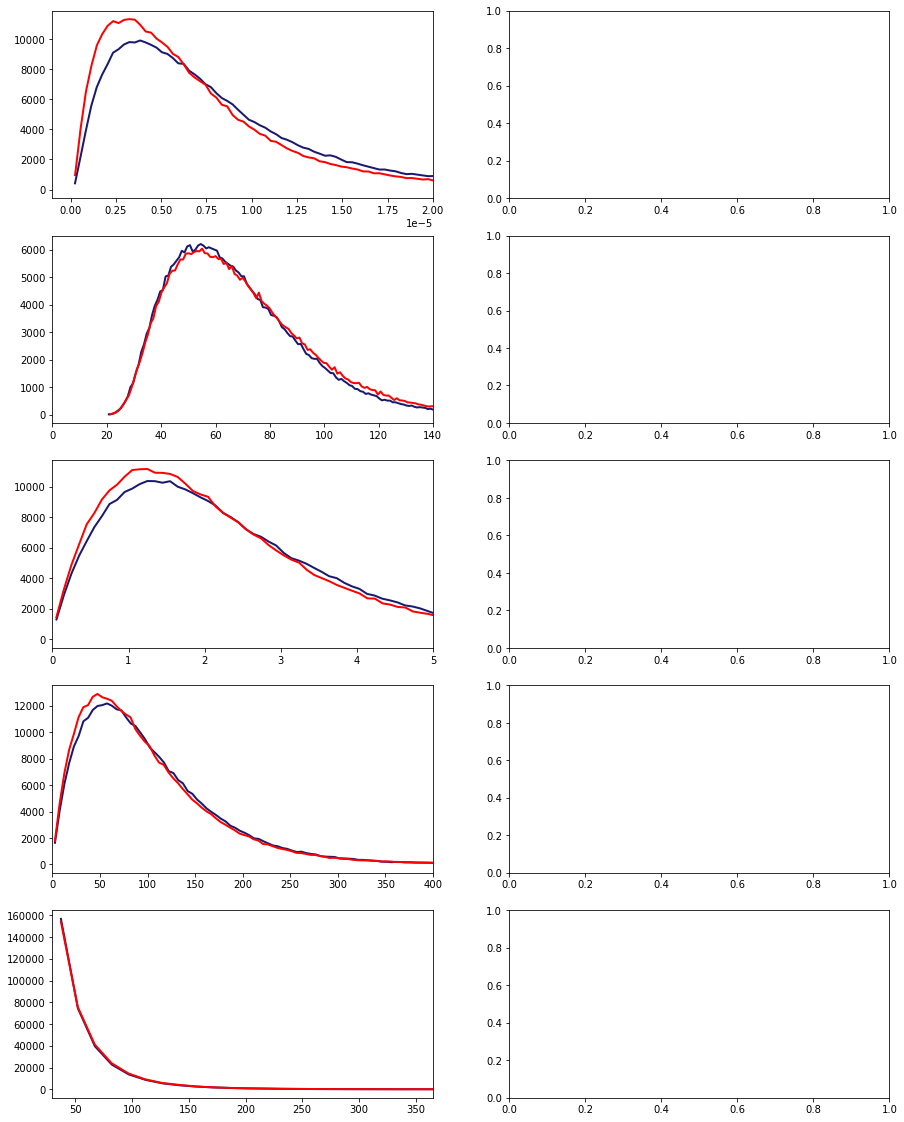

In [75]:
plot_histogram()

(10.0, 2770.95)

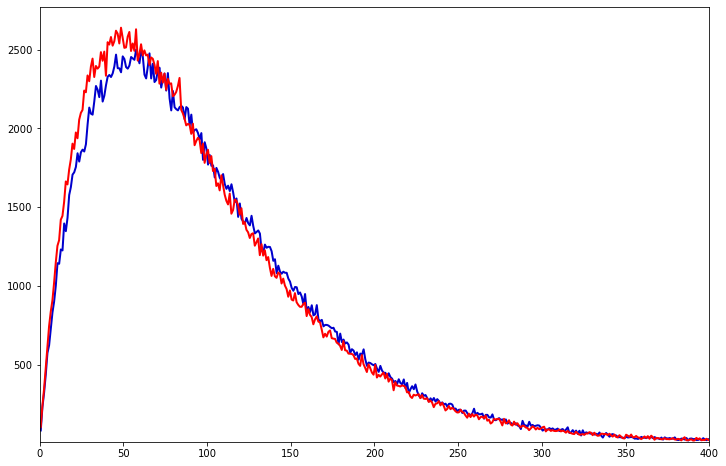

In [14]:
# bins_6 = math.ceil((ed_06['life_time'].astype('timedelta64[D]').max() 
#                                        - ed_06['life_time'].astype('timedelta64[D]').min()) / interval)
interval=1
bins_6 = math.ceil((ed_06['distance'].max() 
                                       - ed_06['distance'].min()) / interval)
y_ed6, bins_ed6 = np.histogram(ed_06['distance'], bins=bins_6)

bincenters_e6= 0.5*(bins_ed6[1:]+bins_ed6[:-1])

bins_5 = math.ceil((ed_05['distance'].max() 
                                       - ed_05['distance'].min()) / interval)
y_ed5, bins_ed5 = np.histogram(ed_05['distance'], bins=bins_5)

bincenters_e5= 0.5*(bins_ed5[1:]+bins_ed5[:-1])

fig, axs = plt.subplots(figsize=(12,8))
axs.plot(bincenters_e6, y_ed6, label= 'EXP06', color='midnightblue', linewidth=2)
axs.plot(bincenters_e5, y_ed5, label= 'EXP05', color='red', linewidth=2)


axs.set_xlim(right=400, left=0)
axs.set_ylim(bottom=10)

In [6]:
np.histogram?

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a dataset.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to the s

In [5]:
math.ceil?

Signature: math.ceil(x, /)
Docstring:
Return the ceiling of x as an Integral.

This is the smallest integer >= x.
Type:      builtin_function_or_method


In [102]:
data_05_2= data_05_2.assign(amp_mean=stat_05_02['amp_mean'], distance=stat_05_02['distance'], scale_mean= stat_05_02['scale_mean'])

In [71]:
data_05_2 = stat_05_02[['time','type', 'life_time', 'speed', 'scale_max', 'amp_max']].copy()

In [12]:
np.where(np.isnan(data_5["year_i"].values))

(array([     0,      1,      2, ..., 248427, 248428, 248429]),)

In [180]:
data_05.describe()

,life_time,speed,scale_max,amp_max,year_i,year_f,amp_mean,distance,scale_mean
count,248430,248430.000000,248430.000000,2.484300e+05,248430.000000,248430.000000,2.484300e+05,248430.000000,248430.000000
mean,67 days 05:54:33.256853038,2.273442,73.665473,7.905844e-06,1977.240688,1977.421620,5.207580e-06,115.537678,59.835314
std,53 days 06:00:23.458347184,1.533960,28.489316,6.383503e-06,11.568033,11.568251,4.213902e-06,91.387382,22.859343
min,30 days 00:00:00,0.002389,19.908334,1.140841e-07,1958.000000,1958.000000,2.975616e-08,0.204672,18.951270
25%,35 days 00:00:00,1.136720,51.840729,3.429724e-06,1967.000000,1967.000000,2.248320e-06,52.757027,42.526384
50%,50 days 00:00:00,1.942114,68.338359,6.257600e-06,1977.000000,1977.000000,4.099596e-06,92.665456,55.326573
75%,80 days 00:00:00,3.064417,90.606421,1.045126e-05,1987.000000,1988.000000,6.882717e-06,151.931475,72.595113
max,3683 days 00:00:00,13.254281,183.341835,8.436879e-05,1997.000000,1997.000000,4.480990e-05,1292.874545,173.618061


In [ ]:
for i in data_05_1.index:
    data_05_1.loc[i, 'year_i'] = pd.to_datetime(data_05_1.time.loc[i][0]).year
    data_05_1.loc[i, 'year_f'] = pd.to_datetime(data_05_1.time.loc[i][-1]).year

In [ ]:
for i in data_05_2.index:
    data_05_2.loc[i, 'year_i'] = pd.to_datetime(data_05_2.time.loc[i][0]).year
    data_05_2.loc[i, 'year_f'] = pd.to_datetime(data_05_2.time.loc[i][-1]).year

In [68]:
data_05_1.loc[436702, 'year_i'] = pd.to_datetime(data_05_1.time.loc[436702][0]).year

In [58]:
data_05_1.loc[431524, 'year_f'] = pd.to_datetime(data_05_1.time.iloc[431524][-1]).year

In [55]:
pd.to_datetime(data_05_1.time.iloc[431524][-1]).year

1977

In [75]:
data_05_2

,time,type,life_time,speed,scale_max,amp_max,year_i,year_f
1611,"[1978-01-08T12:00:00.000000000, 1978-01-13T12:...",anticyclonic,10 days,0.240417,18.259139,1.392770e-06,1978.0,1978.0
1612,"[1978-01-08T12:00:00.000000000, 1978-01-13T12:...",anticyclonic,100 days,0.109788,30.210557,5.886391e-06,1978.0,1978.0
1613,"[1978-01-08T12:00:00.000000000, 1978-01-13T12:...",anticyclonic,40 days,2.146260,52.377466,5.821783e-06,1978.0,1978.0
1614,"[1978-01-08T12:00:00.000000000, 1978-01-13T12:...",cyclonic,180 days,0.195996,24.870280,1.826120e-06,1978.0,1978.0
1615,"[1978-01-08T12:00:00.000000000, 1978-01-13T12:...",cyclonic,10 days,5.999985,30.971657,3.465632e-06,1978.0,1978.0
...,...,...,...,...,...,...,...,...
430468,"[1997-12-19T12:00:00.000000000, 1997-12-24T12:...",cyclonic,5 days,4.614782,29.967260,2.763548e-06,1997.0,1997.0
430472,"[1997-12-19T12:00:00.000000000, 1997-12-24T12:...",cyclonic,5 days,3.167708,21.878599,6.226394e-07,1997.0,1997.0
430473,"[1997-12-19T12:00:00.000000000, 1997-12-24T12:...",cyclonic,5 days,5.574938,61.103796,1.000343e-05,1997.0,1997.0
430477,"[1997-12-19T12:00:00.000000000, 1997-12-24T12:...",anticyclonic,5 days,3.431616,18.414626,1.826001e-06,1997.0,1997.0
